In [21]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from PIL import Image
from torchvision.transforms import Grayscale, Normalize, ToTensor           
import cv2
import os      
from skimage.transform import resize                                                                                                                             

In [22]:
def data_process(data_path, data_name):

    img_path = os.path.join(data_path,data_name, "images")
    gt_path = os.path.join(data_path,data_name, "labels")
    file_list = list(sorted(os.listdir(img_path)))
      
    img_list = []
    gt_list = []

    for i, file in enumerate(file_list):
        if data_name == "DRIVE":
            img = Image.open(os.path.join(img_path, file))
            gt = Image.open(os.path.join(gt_path, file[0:2] + "_manual1.gif"))
            img_list.append(np.array(img).transpose(2,0,1))
            gt_list.append(np.array(gt))

        elif data_name == "CHASEDB1":
                
            img = Image.open(os.path.join(data_path, file))
            gt = Image.open(os.path.join(data_path, file[0:9] + '_1stHO.png'))
                
            img_list.append(np.array(img).transpose(2,0,1))
            gt_list.append(np.array(gt))
        elif data_name == "STARE":
            
            img = Image.open(os.path.join(img_path, file))
            gt = Image.open(os.path.join(gt_path, file[0:6] + '.ah.ppm'))
         
            img_list.append(np.array(img).transpose(2,0,1))
            gt_list.append(np.array(gt))

        elif data_name == "DCA1":
            
            img = cv2.imread(os.path.join(data_path, file), 0)
            gt = cv2.imread(os.path.join(data_path, file[:-4] + '_gt.pgm'), 0)
            gt = np.where(gt >= 100, 255, 0).astype(np.uint8)
            img_list.append(np.array(img)[np.newaxis])
    
            gt_list.append(np.array(gt))
              
        elif data_name == "CHUAC":
            
            img = cv2.imread(os.path.join(img_path, file), 0)
            if int(file[:-4]) <= 17 and int(file[:-4]) >= 11:
                tail = "PNG"
            else:
                tail = "png"
            gt = cv2.imread(os.path.join(
                gt_path, "angio"+file[:-4] + "ok."+tail), 0)
            gt = np.where(gt >= 100, 255, 0).astype(np.uint8)
            img = cv2.resize(
                img, (512, 512), interpolation=cv2.INTER_LINEAR)
            img_list.append(np.array(img)[np.newaxis])
            gt_list.append(np.array(gt))
    return img_list,gt_list
           

In [23]:
def extend_dim(images,new_slice):


    h,w = images[0].shape[1:]
    new_shape = [new_slice,h,w]
    new_images = []
    for s in images:
        sequence = resize(s,new_shape,order=3,mode = "edge",anti_aliasing=False)
        new_images.append(sequence)
    return new_images


In [24]:
data_path = "/home/lwt/data/pretrain_for_CVSS"
data_name = "CHUAC"

imgs, gts = data_process(data_path,data_name)
new_imgs = extend_dim(imgs,8)



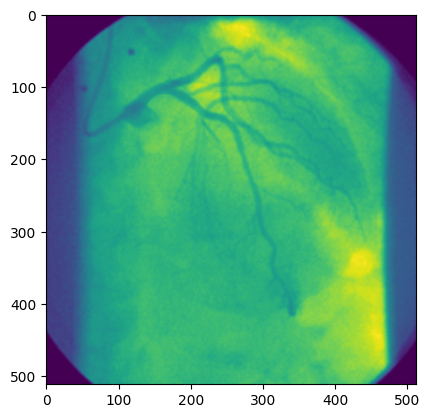

In [25]:
plt.figure()  # 图像窗口名称
plt.imshow(new_imgs[0][0,:,:])
# plt.axis('on')  # 关掉坐标轴为 off
# plt.title('image')  # 图像题目
 
# 必须有这个，要不然无法显示
plt.show()


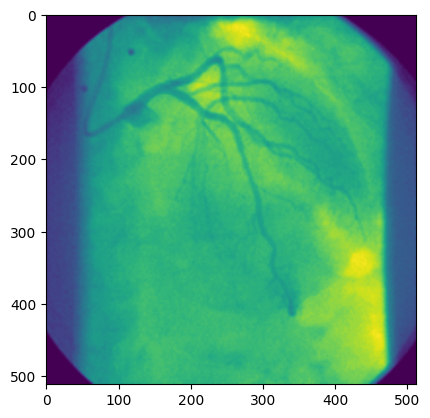

In [26]:
plt.figure()  # 图像窗口名称
plt.imshow(new_imgs[0][5,:,:])
# plt.axis('on')  # 关坐标轴为 off
# plt.title('image')  # 图像题目
 
# 必须有这个，要不然无法显示
plt.show()

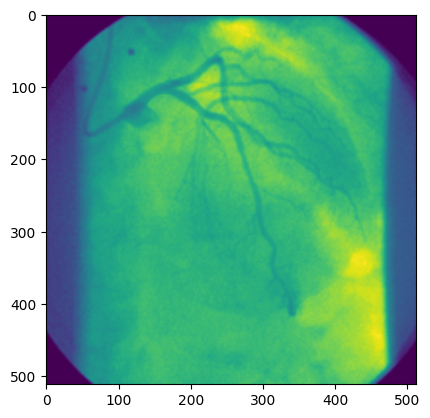

In [29]:
plt.figure()  # 图像窗口名称
plt.imshow(new_imgs[0][7,:,:])
# plt.axis('on')  # 关掉坐标轴为 off
# plt.title('image')  # 图像题目
 
# 必须有这个，要不然无法显示
plt.show()

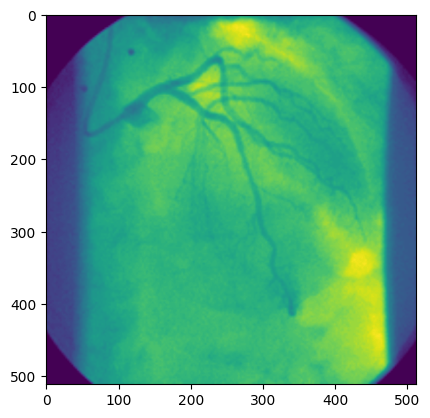

In [30]:
plt.figure()  # 图像窗口名称
plt.imshow(imgs[0][0,:,:])
# plt.axis('on')  # 关坐标轴为 off
# plt.title('image')  # 图像题目
 
# 必须有这个，要不然无法显示
plt.show()